In [3]:
import pandas as pd
from Meaner import Meaner
import matplotlib.pyplot as plt
import seaborn as sns

def get_missing_values_columns(col):
    null_values_column = []
    for column, count in col.items():
        if count >= 1:
            null_values_column.append(column)
    return null_values_column

In [4]:
# Input data
df = pd.read_csv('e.csv')

In [15]:
# Display missing vales
print("Checking missing values...\n")
count_missing_values = df.isnull().sum()
missing_values_columns = get_missing_values_columns(count_missing_values)

meaner_instance = Meaner(df)
dict_col_mean_mode = {}

for val in missing_values_columns:
    mean_mode = meaner_instance.get_mean_mode(val)
    dict_col_mean_mode[val] = mean_mode

print("Col/Mean ",dict_col_mean_mode,"\n")

Checking missing values...

Col/Mean  {} 



In [10]:
#Populate missing values with mean or mode

for column, value in dict_col_mean_mode.items():
    df[column].fillna(value, inplace=True)

C:\Users\Angela\AppData\Local\Temp\ipykernel_15080\3374154986.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


In [11]:
#Re-check for missing values
print("Validate repopulation\n")
print(df.isnull().sum())

Validate repopulation

Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64


In [12]:
# Supprimer les doublons
print("Checking duplicates...\n")
if df.drop_duplicates(inplace=True) is None:
    print("No duplicates found\n")
else:
    print("Duplicates found and deleted\n")

Checking duplicates...

No duplicates found



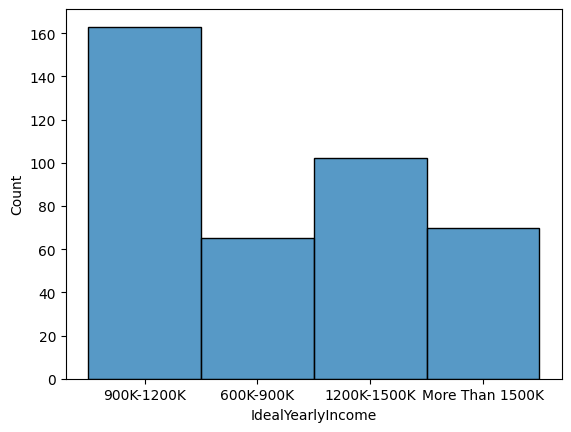

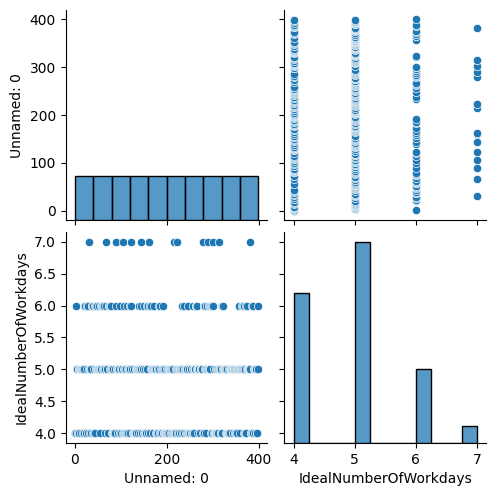

In [13]:
#Vizualize data

# Distribution des revenus idéaux
sns.histplot(df['IdealYearlyIncome'])
plt.show()

# Relations entre différentes variables
sns.pairplot(df)
plt.show()